### Import relevant libraries

In [231]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#----------Utilities----------#
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import warnings
from numpy import mean
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#----------Visualization----------#
import matplotlib.pyplot as plt
import seaborn as sns

#----------Models----------#
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

#----------Validation----------#
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#----------Metrics----------#
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, plot_roc_curve, roc_auc_score

#----------Optimization----------#
#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer

#----------Data Processing----------#
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler

#----------Settings----------#
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

import warnings
warnings.filterwarnings('ignore')

### Load the data

In [292]:
df = pd.read_excel('budget_data_updated.xlsx')
df

,date,cif,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,GENDER_DESC,CUSTOMER_TYPE,CUSTOMER_CATEGORY_DESC,NATIONALITY_DESC,SALARY,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,SEGMENT_TIER,FCPCSTCAT,CUST_SEGMENT_DEMOG,CUST_SEGMENT_BAL,KD_SAL_AMOUNT
0,2021-04-30,135017716,2,2,1,0,0.000,0.00,0.00,3.100,0.000,0.000,0.000,0.000,0.000,Male,Individual,SENYAR,INDIA,0.0,1. Less than 500,42.3,6. 40-50,1,2,3164.704086,1,1,1,0,20,483.815,4,3,1,EXPATS,4,others,2. Smart Saver,0.000
1,2021-04-30,135018553,1,3,2,0,73.570,0.00,0.00,8.500,114.480,2.540,373.110,25.030,0.000,Male,Individual,STAFF,KUWAIT,0.0,1. Less than 500,34.8,5. 30-40,1,3,72.532000,0,1,0,0,20,319.490,7,2,1,STAFF,4,3. Kuwaiti Young Males,2. Smart Saver,0.000
2,2021-04-30,135018688,1,1,3,0,241.220,25.00,0.00,35.005,130.690,618.025,10364.298,295.725,170.026,Male,Individual,IN-ALSAFWA,KUWAIT,0.0,1. Less than 500,36.8,5. 30-40,1,2,0.138000,1,1,1,0,0,0.000,7,3,2,SAFWA,4,4. Kuwaiti Household,1. Inactive,0.000
3,2021-04-30,1109816,1,4,0,6,301.408,116.63,8.80,240.000,70.745,57.050,373.290,0.000,280.000,Male,Individual,IN-ALSAFWA,KUWAIT,1148.0,5. 2000-5000,42.3,6. 40-50,1,1,30.580999,0,1,1,1,33,1523.923,2,2,2,SAFWA,4,4. Kuwaiti Household,1. Basic Saver,3081.486
4,2021-04-30,1109819,1,2,1,6,14.510,0.00,23.35,92.950,84.350,224.800,143.450,0.000,322.870,Male,Individual,IN-ALSAFWA,KUWAIT,1272.0,4. 1500-2000,28.5,4. 21-30,1,2,3894.737061,1,1,0,1,16,811.630,5,3,2,SAFWA,4,3. Kuwaiti Young Males,2. Smart Saver,1729.686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150679,2021-12-31,1275431,2,4,0,1,0.000,0.00,0.00,20.500,0.000,0.000,0.000,0.000,591.250,Male,Individual,IND-NORMAL,BANGLADESH,750.0,2. 500-1000,38.7,5. 30-40,1,1,116.891998,0,0,0,0,15,952.750,1,1,1,EXPATS,4,8. Expats lOW Income,2. Smart Saver,40.000
150680,2021-12-31,1275504,2,4,0,0,22.965,14.50,12.00,0.000,111.290,14.350,97.000,9.500,210.000,Male,Individual,IND-NORMAL,"IRAN, ISLAMIC REPUBLIC OF",0.0,1. Less than 500,30.7,5. 30-40,1,1,325.201996,0,0,0,0,74,361.755,1,1,1,EXPATS,4,others,2. Smart Saver,0.000
150681,2021-12-31,1400000,1,2,4,6,256.205,15.00,5.00,0.000,127.700,33.350,127.870,249.900,600.450,Male,Individual,IN-ALSAFWA,KUWAIT,2524.0,6. 5000+,62.9,8. >=60,1,3,3910.292110,1,1,1,1,10,379.050,8,3,2,SAFWA,4,6. Kuwaiti Elder Male,2. Smart Saver,10276.337
150682,2022-01-31,1125897,2,3,2,6,58.205,16.75,27.90,5.000,32.600,0.000,406.260,0.000,1951.506,Male,Individual,IND_W,EGYPT,1325.0,4. 1500-2000,38.8,5. 30-40,1,2,418.221001,0,1,1,1,33,2199.131,4,2,1,EXPATS,4,8. Expats lOW Income,2. Smart Saver,1623.418


In [293]:
df = df.set_index('cif')
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,GENDER_DESC,CUSTOMER_TYPE,CUSTOMER_CATEGORY_DESC,NATIONALITY_DESC,SALARY,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,SEGMENT_TIER,FCPCSTCAT,CUST_SEGMENT_DEMOG,CUST_SEGMENT_BAL,KD_SAL_AMOUNT
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135017716,2021-04-30,2,2,1,0,0.000,0.00,0.00,3.100,0.000,0.000,0.000,0.000,0.000,Male,Individual,SENYAR,INDIA,0.0,1. Less than 500,42.3,6. 40-50,1,2,3164.704086,1,1,1,0,20,483.815,4,3,1,EXPATS,4,others,2. Smart Saver,0.000
135018553,2021-04-30,1,3,2,0,73.570,0.00,0.00,8.500,114.480,2.540,373.110,25.030,0.000,Male,Individual,STAFF,KUWAIT,0.0,1. Less than 500,34.8,5. 30-40,1,3,72.532000,0,1,0,0,20,319.490,7,2,1,STAFF,4,3. Kuwaiti Young Males,2. Smart Saver,0.000
135018688,2021-04-30,1,1,3,0,241.220,25.00,0.00,35.005,130.690,618.025,10364.298,295.725,170.026,Male,Individual,IN-ALSAFWA,KUWAIT,0.0,1. Less than 500,36.8,5. 30-40,1,2,0.138000,1,1,1,0,0,0.000,7,3,2,SAFWA,4,4. Kuwaiti Household,1. Inactive,0.000
1109816,2021-04-30,1,4,0,6,301.408,116.63,8.80,240.000,70.745,57.050,373.290,0.000,280.000,Male,Individual,IN-ALSAFWA,KUWAIT,1148.0,5. 2000-5000,42.3,6. 40-50,1,1,30.580999,0,1,1,1,33,1523.923,2,2,2,SAFWA,4,4. Kuwaiti Household,1. Basic Saver,3081.486
1109819,2021-04-30,1,2,1,6,14.510,0.00,23.35,92.950,84.350,224.800,143.450,0.000,322.870,Male,Individual,IN-ALSAFWA,KUWAIT,1272.0,4. 1500-2000,28.5,4. 21-30,1,2,3894.737061,1,1,0,1,16,811.630,5,3,2,SAFWA,4,3. Kuwaiti Young Males,2. Smart Saver,1729.686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275431,2021-12-31,2,4,0,1,0.000,0.00,0.00,20.500,0.000,0.000,0.000,0.000,591.250,Male,Individual,IND-NORMAL,BANGLADESH,750.0,2. 500-1000,38.7,5. 30-40,1,1,116.891998,0,0,0,0,15,952.750,1,1,1,EXPATS,4,8. Expats lOW Income,2. Smart Saver,40.000
1275504,2021-12-31,2,4,0,0,22.965,14.50,12.00,0.000,111.290,14.350,97.000,9.500,210.000,Male,Individual,IND-NORMAL,"IRAN, ISLAMIC REPUBLIC OF",0.0,1. Less than 500,30.7,5. 30-40,1,1,325.201996,0,0,0,0,74,361.755,1,1,1,EXPATS,4,others,2. Smart Saver,0.000
1400000,2021-12-31,1,2,4,6,256.205,15.00,5.00,0.000,127.700,33.350,127.870,249.900,600.450,Male,Individual,IN-ALSAFWA,KUWAIT,2524.0,6. 5000+,62.9,8. >=60,1,3,3910.292110,1,1,1,1,10,379.050,8,3,2,SAFWA,4,6. Kuwaiti Elder Male,2. Smart Saver,10276.337


### EDA

In [294]:
df.columns

Index(['date', 'nationality', 'customer_category', 'NO_OF_ALL_CC', 'NO_OF_SAL_HITS', 'Groceries', 'Transportation', 'Health', 'Utilities', 'DiningOut', 'BillsAndServices', 'Shopping', 'Entertainment', 'MoneyTransfer', 'GENDER_DESC', 'CUSTOMER_TYPE', 'CUSTOMER_CATEGORY_DESC', 'NATIONALITY_DESC', 'SALARY', 'CUST_SALARY_RANGE_TIER', 'CUST_AGE', 'CUST_AGE_TIER', 'CUST_STATUS_TIER', 'NO_OF_ALL_ACC', 'KD_BAL_ALL_ACC', 'IS_CUST_HOLDING_PF', 'IS_CUST_HOLDING_CC', 'IS_CUST_HOLDING_PRE_PAID', 'IS_CUST_WITH_SAL_TRF', 'NO_OF_POS_TXS', 'KD_OF_ALL_POS_TXS', 'NO_OF_ALL_PRODUCTS', 'NO_OF_ALL_PRODUCT_CATEGORIES', 'CUST_SECTOR_TIER', 'SEGMENT_TIER', 'FCPCSTCAT', 'CUST_SEGMENT_DEMOG', 'CUST_SEGMENT_BAL', 'KD_SAL_AMOUNT'], dtype='object')

In [295]:
cols = ['date', 'nationality', 'customer_category', 'NO_OF_ALL_CC', 'NO_OF_SAL_HITS',
        
'GENDER_DESC', 'CUSTOMER_TYPE', 'CUSTOMER_CATEGORY_DESC', 'NATIONALITY_DESC', 'SALARY','KD_SAL_AMOUNT',
        
'CUST_SALARY_RANGE_TIER', 'CUST_AGE', 'CUST_AGE_TIER', 'CUST_STATUS_TIER', 'NO_OF_ALL_ACC', 
        
'KD_BAL_ALL_ACC', 'IS_CUST_HOLDING_PF', 'IS_CUST_HOLDING_CC', 'IS_CUST_HOLDING_PRE_PAID', 
        
'IS_CUST_WITH_SAL_TRF', 'NO_OF_POS_TXS', 'KD_OF_ALL_POS_TXS', 'NO_OF_ALL_PRODUCTS', 'NO_OF_ALL_PRODUCT_CATEGORIES',
        
'CUST_SECTOR_TIER', 'SEGMENT_TIER', 'FCPCSTCAT', 'CUST_SEGMENT_DEMOG', 'CUST_SEGMENT_BAL',
'Groceries', 'Transportation', 'Health', 'Utilities', 'DiningOut', 'BillsAndServices', 'Shopping', 'Entertainment','MoneyTransfer']

In [296]:
df = df[cols]
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUSTOMER_TYPE,CUSTOMER_CATEGORY_DESC,NATIONALITY_DESC,SALARY,KD_SAL_AMOUNT,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,SEGMENT_TIER,FCPCSTCAT,CUST_SEGMENT_DEMOG,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135017716,2021-04-30,2,2,1,0,Male,Individual,SENYAR,INDIA,0.0,0.000,1. Less than 500,42.3,6. 40-50,1,2,3164.704086,1,1,1,0,20,483.815,4,3,1,EXPATS,4,others,2. Smart Saver,0.000,0.00,0.00,3.100,0.000,0.000,0.000,0.000,0.000
135018553,2021-04-30,1,3,2,0,Male,Individual,STAFF,KUWAIT,0.0,0.000,1. Less than 500,34.8,5. 30-40,1,3,72.532000,0,1,0,0,20,319.490,7,2,1,STAFF,4,3. Kuwaiti Young Males,2. Smart Saver,73.570,0.00,0.00,8.500,114.480,2.540,373.110,25.030,0.000
135018688,2021-04-30,1,1,3,0,Male,Individual,IN-ALSAFWA,KUWAIT,0.0,0.000,1. Less than 500,36.8,5. 30-40,1,2,0.138000,1,1,1,0,0,0.000,7,3,2,SAFWA,4,4. Kuwaiti Household,1. Inactive,241.220,25.00,0.00,35.005,130.690,618.025,10364.298,295.725,170.026
1109816,2021-04-30,1,4,0,6,Male,Individual,IN-ALSAFWA,KUWAIT,1148.0,3081.486,5. 2000-5000,42.3,6. 40-50,1,1,30.580999,0,1,1,1,33,1523.923,2,2,2,SAFWA,4,4. Kuwaiti Household,1. Basic Saver,301.408,116.63,8.80,240.000,70.745,57.050,373.290,0.000,280.000
1109819,2021-04-30,1,2,1,6,Male,Individual,IN-ALSAFWA,KUWAIT,1272.0,1729.686,4. 1500-2000,28.5,4. 21-30,1,2,3894.737061,1,1,0,1,16,811.630,5,3,2,SAFWA,4,3. Kuwaiti Young Males,2. Smart Saver,14.510,0.00,23.35,92.950,84.350,224.800,143.450,0.000,322.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275431,2021-12-31,2,4,0,1,Male,Individual,IND-NORMAL,BANGLADESH,750.0,40.000,2. 500-1000,38.7,5. 30-40,1,1,116.891998,0,0,0,0,15,952.750,1,1,1,EXPATS,4,8. Expats lOW Income,2. Smart Saver,0.000,0.00,0.00,20.500,0.000,0.000,0.000,0.000,591.250
1275504,2021-12-31,2,4,0,0,Male,Individual,IND-NORMAL,"IRAN, ISLAMIC REPUBLIC OF",0.0,0.000,1. Less than 500,30.7,5. 30-40,1,1,325.201996,0,0,0,0,74,361.755,1,1,1,EXPATS,4,others,2. Smart Saver,22.965,14.50,12.00,0.000,111.290,14.350,97.000,9.500,210.000
1400000,2021-12-31,1,2,4,6,Male,Individual,IN-ALSAFWA,KUWAIT,2524.0,10276.337,6. 5000+,62.9,8. >=60,1,3,3910.292110,1,1,1,1,10,379.050,8,3,2,SAFWA,4,6. Kuwaiti Elder Male,2. Smart Saver,256.205,15.00,5.00,0.000,127.700,33.350,127.870,249.900,600.450


In [262]:
# Get the count of Zeros in column 'C' 
count = (df['SALARY'] == 0).sum()
print('Count of zeros : ', count)

Count of zeros :  4621


In [263]:
# Get the count of Zeros in column 'C' 
count = (df['KD_SAL_AMOUNT'] == 0).sum()
print('Count of zeros: ', count)

Count of zeros:  21505


In [264]:
df['CUST_SALARY_RANGE_TIER'].value_counts()

3. 1000-1500        42692
2. 500-1000         32443
4. 1500-2000        29453
5. 2000-5000        27927
1. Less than 500    16419
6. 5000+             1742
01. Unknown             8
Name: CUST_SALARY_RANGE_TIER, dtype: int64

In [ ]:
#pd.options.display.max_rows=None

In [297]:
df_n  = df.query('CUST_SALARY_RANGE_TIER == "01. Unknown" or CUST_SALARY_RANGE_TIER == "6. 5000+"')
df_n 

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUSTOMER_TYPE,CUSTOMER_CATEGORY_DESC,NATIONALITY_DESC,SALARY,KD_SAL_AMOUNT,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,SEGMENT_TIER,FCPCSTCAT,CUST_SEGMENT_DEMOG,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1009661,2021-04-30,1,2,2,6,Male,Individual,IN-ALSAFWA,KUWAIT,5891.0,6851.750,6. 5000+,44.4,6. 40-50,1,4,231.813007,1,1,1,1,44,9496.585,12,3,2,SAFWA,4,4. Kuwaiti Household,1. Basic Saver,83.235,39.000,44.050,0.31,0.000,1025.90,2844.750,0.000,14370.00
1042995,2021-04-30,1,2,1,6,Female,Individual,IN-ALSAFWA,KUWAIT,1823.0,6078.449,6. 5000+,42.8,6. 40-50,1,1,13222.123047,1,1,0,1,31,2950.500,4,3,2,SAFWA,4,2. Kuwaiti Women,1. Basic Saver,437.860,8.500,60.000,282.00,7.000,10.50,1202.650,12.500,1835.13
1038921,2021-04-30,1,2,2,6,Male,Individual,IN-ALSAFWA,KUWAIT,6843.0,6158.583,6. 5000+,48.6,6. 40-50,1,2,3618.393000,1,1,1,1,38,2377.870,6,3,2,SAFWA,4,4. Kuwaiti Household,2. Smart Saver,304.520,195.150,35.000,147.00,232.885,27.72,964.650,0.000,1543.70
1040440,2021-04-30,1,2,1,6,Male,Individual,IN-ALSAFWA,KUWAIT,3188.0,5454.408,6. 5000+,41.8,6. 40-50,1,3,1039.799000,1,1,1,1,14,1029.515,7,3,2,SAFWA,4,4. Kuwaiti Household,2. Smart Saver,386.110,0.000,42.135,0.00,0.000,0.00,191.800,0.000,1643.00
1116161,2021-04-30,1,2,2,6,Male,Individual,IN-ALSAFWA,KUWAIT,4244.0,6856.398,6. 5000+,51.2,7. 50-60,1,3,1613.938984,1,1,1,1,33,1185.180,8,3,2,SAFWA,4,4. Kuwaiti Household,2. Smart Saver,80.060,13.500,139.280,0.00,59.500,95.06,350.050,0.000,1376.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264793,2021-12-31,1,1,1,0,Male,Individual,ALMASSY,KUWAIT,6000.0,0.000,6. 5000+,45.4,6. 40-50,1,5,751014.052979,0,1,0,0,0,0.000,6,3,1,ALMASSY,4,4. Kuwaiti Household,3. Long Term Planner,16.450,0.000,14.000,3.00,183.500,0.00,655.843,437.641,0.00
1268344,2021-12-31,1,2,2,6,Male,Individual,IN-ALSAFWA,KUWAIT,2955.0,5178.389,6. 5000+,32.9,5. 30-40,1,2,21566.520359,1,1,1,1,34,2193.085,7,3,2,SAFWA,4,3. Kuwaiti Young Males,2. Smart Saver,63.285,144.115,106.890,50.16,40.600,6.40,328.420,280.000,2000.30
1269606,2021-12-31,1,2,0,2,Male,Individual,IN-ALSAFWA,KUWAIT,1200.0,9252.964,6. 5000+,46.0,6. 40-50,1,1,19502.970703,0,0,0,1,41,7962.455,1,1,2,SAFWA,4,4. Kuwaiti Household,2. Smart Saver,106.555,0.000,0.000,136.50,0.000,992.95,3071.100,0.000,4837.00


In [243]:
df_n.shape

(1750, 39)

In [298]:
df = df[~df['CUST_SALARY_RANGE_TIER'].isin(['01. Unknown','6. 5000+'])]
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUSTOMER_TYPE,CUSTOMER_CATEGORY_DESC,NATIONALITY_DESC,SALARY,KD_SAL_AMOUNT,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,SEGMENT_TIER,FCPCSTCAT,CUST_SEGMENT_DEMOG,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135017716,2021-04-30,2,2,1,0,Male,Individual,SENYAR,INDIA,0.0,0.000,1. Less than 500,42.3,6. 40-50,1,2,3164.704086,1,1,1,0,20,483.815,4,3,1,EXPATS,4,others,2. Smart Saver,0.000,0.00,0.00,3.100,0.000,0.000,0.000,0.000,0.000
135018553,2021-04-30,1,3,2,0,Male,Individual,STAFF,KUWAIT,0.0,0.000,1. Less than 500,34.8,5. 30-40,1,3,72.532000,0,1,0,0,20,319.490,7,2,1,STAFF,4,3. Kuwaiti Young Males,2. Smart Saver,73.570,0.00,0.00,8.500,114.480,2.540,373.110,25.030,0.000
135018688,2021-04-30,1,1,3,0,Male,Individual,IN-ALSAFWA,KUWAIT,0.0,0.000,1. Less than 500,36.8,5. 30-40,1,2,0.138000,1,1,1,0,0,0.000,7,3,2,SAFWA,4,4. Kuwaiti Household,1. Inactive,241.220,25.00,0.00,35.005,130.690,618.025,10364.298,295.725,170.026
1109816,2021-04-30,1,4,0,6,Male,Individual,IN-ALSAFWA,KUWAIT,1148.0,3081.486,5. 2000-5000,42.3,6. 40-50,1,1,30.580999,0,1,1,1,33,1523.923,2,2,2,SAFWA,4,4. Kuwaiti Household,1. Basic Saver,301.408,116.63,8.80,240.000,70.745,57.050,373.290,0.000,280.000
1109819,2021-04-30,1,2,1,6,Male,Individual,IN-ALSAFWA,KUWAIT,1272.0,1729.686,4. 1500-2000,28.5,4. 21-30,1,2,3894.737061,1,1,0,1,16,811.630,5,3,2,SAFWA,4,3. Kuwaiti Young Males,2. Smart Saver,14.510,0.00,23.35,92.950,84.350,224.800,143.450,0.000,322.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275412,2021-12-31,1,4,0,0,Female,Individual,IND-NORMAL,KUWAIT,612.0,0.000,2. 500-1000,55.0,7. 50-60,1,2,1651.383057,0,0,0,0,6,200.000,2,1,1,KUWAITI FEMALE,4,5. Kuwaiti Elder Female,2. Smart Saver,0.000,0.00,0.00,10.000,0.000,0.000,40.000,0.000,110.000
1275431,2021-12-31,2,4,0,1,Male,Individual,IND-NORMAL,BANGLADESH,750.0,40.000,2. 500-1000,38.7,5. 30-40,1,1,116.891998,0,0,0,0,15,952.750,1,1,1,EXPATS,4,8. Expats lOW Income,2. Smart Saver,0.000,0.00,0.00,20.500,0.000,0.000,0.000,0.000,591.250
1275504,2021-12-31,2,4,0,0,Male,Individual,IND-NORMAL,"IRAN, ISLAMIC REPUBLIC OF",0.0,0.000,1. Less than 500,30.7,5. 30-40,1,1,325.201996,0,0,0,0,74,361.755,1,1,1,EXPATS,4,others,2. Smart Saver,22.965,14.50,12.00,0.000,111.290,14.350,97.000,9.500,210.000


In [299]:
def f(x):
    if 'Less' in x:
        return (0 + int(x.split()[-1]))/2
    else:
        y = x.split()[-1]
        y = y.split('-')
        y = int(y[0]) + int(y[1])
        return y/2

In [300]:
df['Salary_temp'] = df['CUST_SALARY_RANGE_TIER'].apply(lambda x: f(x))
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUSTOMER_TYPE,CUSTOMER_CATEGORY_DESC,NATIONALITY_DESC,SALARY,KD_SAL_AMOUNT,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,SEGMENT_TIER,FCPCSTCAT,CUST_SEGMENT_DEMOG,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,Salary_temp
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135017716,2021-04-30,2,2,1,0,Male,Individual,SENYAR,INDIA,0.0,0.000,1. Less than 500,42.3,6. 40-50,1,2,3164.704086,1,1,1,0,20,483.815,4,3,1,EXPATS,4,others,2. Smart Saver,0.000,0.00,0.00,3.100,0.000,0.000,0.000,0.000,0.000,250.0
135018553,2021-04-30,1,3,2,0,Male,Individual,STAFF,KUWAIT,0.0,0.000,1. Less than 500,34.8,5. 30-40,1,3,72.532000,0,1,0,0,20,319.490,7,2,1,STAFF,4,3. Kuwaiti Young Males,2. Smart Saver,73.570,0.00,0.00,8.500,114.480,2.540,373.110,25.030,0.000,250.0
135018688,2021-04-30,1,1,3,0,Male,Individual,IN-ALSAFWA,KUWAIT,0.0,0.000,1. Less than 500,36.8,5. 30-40,1,2,0.138000,1,1,1,0,0,0.000,7,3,2,SAFWA,4,4. Kuwaiti Household,1. Inactive,241.220,25.00,0.00,35.005,130.690,618.025,10364.298,295.725,170.026,250.0
1109816,2021-04-30,1,4,0,6,Male,Individual,IN-ALSAFWA,KUWAIT,1148.0,3081.486,5. 2000-5000,42.3,6. 40-50,1,1,30.580999,0,1,1,1,33,1523.923,2,2,2,SAFWA,4,4. Kuwaiti Household,1. Basic Saver,301.408,116.63,8.80,240.000,70.745,57.050,373.290,0.000,280.000,3500.0
1109819,2021-04-30,1,2,1,6,Male,Individual,IN-ALSAFWA,KUWAIT,1272.0,1729.686,4. 1500-2000,28.5,4. 21-30,1,2,3894.737061,1,1,0,1,16,811.630,5,3,2,SAFWA,4,3. Kuwaiti Young Males,2. Smart Saver,14.510,0.00,23.35,92.950,84.350,224.800,143.450,0.000,322.870,1750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275412,2021-12-31,1,4,0,0,Female,Individual,IND-NORMAL,KUWAIT,612.0,0.000,2. 500-1000,55.0,7. 50-60,1,2,1651.383057,0,0,0,0,6,200.000,2,1,1,KUWAITI FEMALE,4,5. Kuwaiti Elder Female,2. Smart Saver,0.000,0.00,0.00,10.000,0.000,0.000,40.000,0.000,110.000,750.0
1275431,2021-12-31,2,4,0,1,Male,Individual,IND-NORMAL,BANGLADESH,750.0,40.000,2. 500-1000,38.7,5. 30-40,1,1,116.891998,0,0,0,0,15,952.750,1,1,1,EXPATS,4,8. Expats lOW Income,2. Smart Saver,0.000,0.00,0.00,20.500,0.000,0.000,0.000,0.000,591.250,750.0
1275504,2021-12-31,2,4,0,0,Male,Individual,IND-NORMAL,"IRAN, ISLAMIC REPUBLIC OF",0.0,0.000,1. Less than 500,30.7,5. 30-40,1,1,325.201996,0,0,0,0,74,361.755,1,1,1,EXPATS,4,others,2. Smart Saver,22.965,14.50,12.00,0.000,111.290,14.350,97.000,9.500,210.000,250.0


In [272]:
df.columns

Index(['date', 'nationality', 'customer_category', 'NO_OF_ALL_CC', 'NO_OF_SAL_HITS', 'GENDER_DESC', 'CUSTOMER_TYPE', 'CUSTOMER_CATEGORY_DESC', 'NATIONALITY_DESC', 'SALARY', 'KD_SAL_AMOUNT', 'CUST_SALARY_RANGE_TIER', 'CUST_AGE', 'CUST_AGE_TIER', 'CUST_STATUS_TIER', 'NO_OF_ALL_ACC', 'KD_BAL_ALL_ACC', 'IS_CUST_HOLDING_PF', 'IS_CUST_HOLDING_CC', 'IS_CUST_HOLDING_PRE_PAID', 'IS_CUST_WITH_SAL_TRF', 'NO_OF_POS_TXS', 'KD_OF_ALL_POS_TXS', 'NO_OF_ALL_PRODUCTS', 'NO_OF_ALL_PRODUCT_CATEGORIES', 'CUST_SECTOR_TIER', 'SEGMENT_TIER', 'FCPCSTCAT', 'CUST_SEGMENT_DEMOG', 'CUST_SEGMENT_BAL', 'Groceries', 'Transportation', 'Health', 'Utilities', 'DiningOut', 'BillsAndServices', 'Shopping', 'Entertainment', 'MoneyTransfer', 'Salary_temp'], dtype='object')

In [253]:
#a = df[df['customer_category']==1]['KD_SAL_AMOUNT'].max()/15
#a

6666.666666666667

In [301]:
outputs = ['Groceries', 'Transportation', 'Health', 'Utilities', 'DiningOut', 'BillsAndServices', 'Shopping', 'Entertainment','MoneyTransfer']

In [8]:
#df = df[~df['CUST_SALARY_RANGE_TIER'].isin(['01. Unknown','6. 5000+'])]
#df

In [185]:
df['customer_category'].unique()

array([2, 3, 1, 4], dtype=int64)

In [10]:
#df.loc[(df.customer_category ==1), 'Groceries'] = df[df['customer_category']==1]['Groceries'].mean()

In [83]:
a = df[df['customer_category']==1]['Groceries'].mean()
a

133.01987898550723

In [302]:
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUSTOMER_TYPE,CUSTOMER_CATEGORY_DESC,NATIONALITY_DESC,SALARY,KD_SAL_AMOUNT,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,SEGMENT_TIER,FCPCSTCAT,CUST_SEGMENT_DEMOG,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,Salary_temp
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135017716,2021-04-30,2,2,1,0,Male,Individual,SENYAR,INDIA,0.0,0.000,1. Less than 500,42.3,6. 40-50,1,2,3164.704086,1,1,1,0,20,483.815,4,3,1,EXPATS,4,others,2. Smart Saver,0.000,0.00,0.00,3.100,0.000,0.000,0.000,0.000,0.000,250.0
135018553,2021-04-30,1,3,2,0,Male,Individual,STAFF,KUWAIT,0.0,0.000,1. Less than 500,34.8,5. 30-40,1,3,72.532000,0,1,0,0,20,319.490,7,2,1,STAFF,4,3. Kuwaiti Young Males,2. Smart Saver,73.570,0.00,0.00,8.500,114.480,2.540,373.110,25.030,0.000,250.0
135018688,2021-04-30,1,1,3,0,Male,Individual,IN-ALSAFWA,KUWAIT,0.0,0.000,1. Less than 500,36.8,5. 30-40,1,2,0.138000,1,1,1,0,0,0.000,7,3,2,SAFWA,4,4. Kuwaiti Household,1. Inactive,241.220,25.00,0.00,35.005,130.690,618.025,10364.298,295.725,170.026,250.0
1109816,2021-04-30,1,4,0,6,Male,Individual,IN-ALSAFWA,KUWAIT,1148.0,3081.486,5. 2000-5000,42.3,6. 40-50,1,1,30.580999,0,1,1,1,33,1523.923,2,2,2,SAFWA,4,4. Kuwaiti Household,1. Basic Saver,301.408,116.63,8.80,240.000,70.745,57.050,373.290,0.000,280.000,3500.0
1109819,2021-04-30,1,2,1,6,Male,Individual,IN-ALSAFWA,KUWAIT,1272.0,1729.686,4. 1500-2000,28.5,4. 21-30,1,2,3894.737061,1,1,0,1,16,811.630,5,3,2,SAFWA,4,3. Kuwaiti Young Males,2. Smart Saver,14.510,0.00,23.35,92.950,84.350,224.800,143.450,0.000,322.870,1750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275412,2021-12-31,1,4,0,0,Female,Individual,IND-NORMAL,KUWAIT,612.0,0.000,2. 500-1000,55.0,7. 50-60,1,2,1651.383057,0,0,0,0,6,200.000,2,1,1,KUWAITI FEMALE,4,5. Kuwaiti Elder Female,2. Smart Saver,0.000,0.00,0.00,10.000,0.000,0.000,40.000,0.000,110.000,750.0
1275431,2021-12-31,2,4,0,1,Male,Individual,IND-NORMAL,BANGLADESH,750.0,40.000,2. 500-1000,38.7,5. 30-40,1,1,116.891998,0,0,0,0,15,952.750,1,1,1,EXPATS,4,8. Expats lOW Income,2. Smart Saver,0.000,0.00,0.00,20.500,0.000,0.000,0.000,0.000,591.250,750.0
1275504,2021-12-31,2,4,0,0,Male,Individual,IND-NORMAL,"IRAN, ISLAMIC REPUBLIC OF",0.0,0.000,1. Less than 500,30.7,5. 30-40,1,1,325.201996,0,0,0,0,74,361.755,1,1,1,EXPATS,4,others,2. Smart Saver,22.965,14.50,12.00,0.000,111.290,14.350,97.000,9.500,210.000,250.0


### Dealing with zeros

In [12]:
#df['Groceries'].where(~(df.Groceries ==0), other=a, inplace=True)
#df

In [303]:
df_1 = df.query('customer_category == 1')
df_1.replace(0,df_1[outputs].mean(axis=0),inplace=True)
df_2 = df.query('customer_category == 2')
df_2.replace(0,df_2[outputs].mean(axis=0),inplace=True)
df_3 = df.query('customer_category == 3')
df_3.replace(0,df_3[outputs].mean(axis=0),inplace=True)
df_4 = df.query('customer_category == 4')
df_4.replace(0,df_4[outputs].mean(axis=0),inplace=True)
#df_5 = df.query('customer_category == 5')
#df_5.replace(0,df_5[outputs].mean(axis=0),inplace=True)
df = pd.concat([df_1,df_2,df_3,df_4])
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUSTOMER_TYPE,CUSTOMER_CATEGORY_DESC,NATIONALITY_DESC,SALARY,KD_SAL_AMOUNT,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,SEGMENT_TIER,FCPCSTCAT,CUST_SEGMENT_DEMOG,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,Salary_temp
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135018688,2021-04-30,1,1,3,0,Male,Individual,IN-ALSAFWA,KUWAIT,0.0,0.000,1. Less than 500,36.8,5. 30-40,1,2,0.138000,1,1,1,0,0,0.000,7,3,2,SAFWA,4,4. Kuwaiti Household,1. Inactive,241.220000,25.000000,105.807266,35.005000,130.690000,618.025000,10364.298000,295.725000,170.026000,250.0
135017757,2021-04-30,2,1,3,0,Male,Individual,IN-ALSAFWA,SAUDI ARABIA,0.0,0.000,1. Less than 500,37.4,5. 30-40,1,2,5310.994995,1,1,1,0,12,244.450,8,3,2,SAFWA,4,others,2. Smart Saver,161.885000,20.000000,28.000000,32.200000,22.700000,249.745410,166.800000,201.992103,1397.668991,250.0
135017850,2021-04-30,1,1,4,0,Male,Individual,ALMASSY,KUWAIT,0.0,0.000,1. Less than 500,40.2,6. 40-50,1,4,2233.969002,1,1,1,0,35,3673.000,9,3,1,ALMASSY,4,4. Kuwaiti Household,1. Basic Saver,55.215000,272.926650,105.807266,110.245000,78.200000,0.490000,48.606000,201.992103,1397.668991,250.0
232218140,2021-04-30,2,1,3,0,Male,Individual,ALMASSY,EGYPT,0.0,0.000,1. Less than 500,45.8,6. 40-50,1,14,57581.537598,1,1,1,0,37,760.704,18,4,1,ALMASSY,4,others,3. Long Term Planner,254.025000,272.926650,105.807266,410.000000,59.900000,161.136000,38.250000,201.992103,1397.668991,250.0
135018310,2021-04-30,1,1,5,0,Male,Individual,ALMASSY,KUWAIT,0.0,0.000,1. Less than 500,67.5,8. >=60,1,3,9492.726345,1,1,1,0,3,410.000,9,3,1,ALMASSY,4,6. Kuwaiti Elder Male,1. Basic Saver,132.730000,272.926650,15.350000,165.890640,40.050000,91.790000,49.000000,201.992103,1397.668991,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275361,2021-12-31,2,4,0,6,Male,Individual,IND-NORMAL,LEBANON,450.0,450.000,1. Less than 500,24.6,4. 21-30,1,1,257.980011,0,0,0,1,40,485.685,1,1,1,EXPATS,4,others,1. Basic Saver,5.175000,172.000000,20.890000,18.500000,23.070000,2.750000,75.740000,33.234845,198.000000,250.0
1275399,2021-12-31,2,4,0,5,Female,Individual,IND-NORMAL,LEBANON,270.0,318.943,1. Less than 500,28.6,4. 21-30,1,1,0.787000,0,0,0,1,12,85.550,1,1,1,EXPATS,4,others,1. Inactive,5.500000,31.348062,42.000000,40.367855,10.300000,68.954615,11.750000,33.234845,86.000000,250.0
1275412,2021-12-31,1,4,0,0,Female,Individual,IND-NORMAL,KUWAIT,612.0,0.000,2. 500-1000,55.0,7. 50-60,1,2,1651.383057,0,0,0,0,6,200.000,2,1,1,KUWAITI FEMALE,4,5. Kuwaiti Elder Female,2. Smart Saver,42.980752,31.348062,49.752952,10.000000,76.828975,68.954615,40.000000,33.234845,110.000000,750.0


In [304]:
df.isna().sum()

date                              0
nationality                       0
customer_category                 0
NO_OF_ALL_CC                      0
NO_OF_SAL_HITS                    0
GENDER_DESC                       0
CUSTOMER_TYPE                     0
CUSTOMER_CATEGORY_DESC            0
NATIONALITY_DESC                  0
SALARY                           70
KD_SAL_AMOUNT                     0
CUST_SALARY_RANGE_TIER            0
CUST_AGE                          0
CUST_AGE_TIER                     0
CUST_STATUS_TIER                  0
NO_OF_ALL_ACC                     0
KD_BAL_ALL_ACC                    0
IS_CUST_HOLDING_PF                0
IS_CUST_HOLDING_CC                0
IS_CUST_HOLDING_PRE_PAID          0
IS_CUST_WITH_SAL_TRF              0
NO_OF_POS_TXS                     0
KD_OF_ALL_POS_TXS                 0
NO_OF_ALL_PRODUCTS                0
NO_OF_ALL_PRODUCT_CATEGORIES      0
CUST_SECTOR_TIER                  0
SEGMENT_TIER                      0
FCPCSTCAT                   

In [189]:
df.columns

Index(['date', 'nationality', 'customer_category', 'NO_OF_ALL_CC', 'NO_OF_SAL_HITS', 'Groceries', 'Transportation', 'Health', 'Utilities', 'DiningOut', 'BillsAndServices', 'Shopping', 'Entertainment', 'MoneyTransfer', 'GENDER_DESC', 'CUSTOMER_TYPE', 'CUSTOMER_CATEGORY_DESC', 'NATIONALITY_DESC', 'SALARY', 'CUST_SALARY_RANGE_TIER', 'CUST_AGE', 'CUST_AGE_TIER', 'CUST_STATUS_TIER', 'NO_OF_ALL_ACC', 'KD_BAL_ALL_ACC', 'IS_CUST_HOLDING_PF', 'IS_CUST_HOLDING_CC', 'IS_CUST_HOLDING_PRE_PAID', 'IS_CUST_WITH_SAL_TRF', 'NO_OF_POS_TXS', 'KD_OF_ALL_POS_TXS', 'NO_OF_ALL_PRODUCTS', 'NO_OF_ALL_PRODUCT_CATEGORIES', 'CUST_SECTOR_TIER', 'SEGMENT_TIER', 'FCPCSTCAT', 'CUST_SEGMENT_DEMOG', 'CUST_SEGMENT_BAL', 'KD_SAL_AMOUNT'], dtype='object')

In [305]:
df['GENDER_DESC'] = df['GENDER_DESC'].replace(['Male','Female'],[1,0])

In [306]:
df

,date,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUSTOMER_TYPE,CUSTOMER_CATEGORY_DESC,NATIONALITY_DESC,SALARY,KD_SAL_AMOUNT,CUST_SALARY_RANGE_TIER,CUST_AGE,CUST_AGE_TIER,CUST_STATUS_TIER,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,SEGMENT_TIER,FCPCSTCAT,CUST_SEGMENT_DEMOG,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,Salary_temp
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135018688,2021-04-30,1,1,3,0,1,Individual,IN-ALSAFWA,KUWAIT,0.0,0.000,1. Less than 500,36.8,5. 30-40,1,2,0.138000,1,1,1,0,0,0.000,7,3,2,SAFWA,4,4. Kuwaiti Household,1. Inactive,241.220000,25.000000,105.807266,35.005000,130.690000,618.025000,10364.298000,295.725000,170.026000,250.0
135017757,2021-04-30,2,1,3,0,1,Individual,IN-ALSAFWA,SAUDI ARABIA,0.0,0.000,1. Less than 500,37.4,5. 30-40,1,2,5310.994995,1,1,1,0,12,244.450,8,3,2,SAFWA,4,others,2. Smart Saver,161.885000,20.000000,28.000000,32.200000,22.700000,249.745410,166.800000,201.992103,1397.668991,250.0
135017850,2021-04-30,1,1,4,0,1,Individual,ALMASSY,KUWAIT,0.0,0.000,1. Less than 500,40.2,6. 40-50,1,4,2233.969002,1,1,1,0,35,3673.000,9,3,1,ALMASSY,4,4. Kuwaiti Household,1. Basic Saver,55.215000,272.926650,105.807266,110.245000,78.200000,0.490000,48.606000,201.992103,1397.668991,250.0
232218140,2021-04-30,2,1,3,0,1,Individual,ALMASSY,EGYPT,0.0,0.000,1. Less than 500,45.8,6. 40-50,1,14,57581.537598,1,1,1,0,37,760.704,18,4,1,ALMASSY,4,others,3. Long Term Planner,254.025000,272.926650,105.807266,410.000000,59.900000,161.136000,38.250000,201.992103,1397.668991,250.0
135018310,2021-04-30,1,1,5,0,1,Individual,ALMASSY,KUWAIT,0.0,0.000,1. Less than 500,67.5,8. >=60,1,3,9492.726345,1,1,1,0,3,410.000,9,3,1,ALMASSY,4,6. Kuwaiti Elder Male,1. Basic Saver,132.730000,272.926650,15.350000,165.890640,40.050000,91.790000,49.000000,201.992103,1397.668991,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275361,2021-12-31,2,4,0,6,1,Individual,IND-NORMAL,LEBANON,450.0,450.000,1. Less than 500,24.6,4. 21-30,1,1,257.980011,0,0,0,1,40,485.685,1,1,1,EXPATS,4,others,1. Basic Saver,5.175000,172.000000,20.890000,18.500000,23.070000,2.750000,75.740000,33.234845,198.000000,250.0
1275399,2021-12-31,2,4,0,5,0,Individual,IND-NORMAL,LEBANON,270.0,318.943,1. Less than 500,28.6,4. 21-30,1,1,0.787000,0,0,0,1,12,85.550,1,1,1,EXPATS,4,others,1. Inactive,5.500000,31.348062,42.000000,40.367855,10.300000,68.954615,11.750000,33.234845,86.000000,250.0
1275412,2021-12-31,1,4,0,0,0,Individual,IND-NORMAL,KUWAIT,612.0,0.000,2. 500-1000,55.0,7. 50-60,1,2,1651.383057,0,0,0,0,6,200.000,2,1,1,KUWAITI FEMALE,4,5. Kuwaiti Elder Female,2. Smart Saver,42.980752,31.348062,49.752952,10.000000,76.828975,68.954615,40.000000,33.234845,110.000000,750.0


In [307]:
cols = ['customer_category', 'NO_OF_ALL_CC', 'NO_OF_SAL_HITS',
        
'GENDER_DESC','CUST_AGE',  'NO_OF_ALL_ACC', 'KD_BAL_ALL_ACC', 'IS_CUST_HOLDING_PF', 'IS_CUST_HOLDING_CC', 
        
'IS_CUST_HOLDING_PRE_PAID', 'IS_CUST_WITH_SAL_TRF', 'NO_OF_POS_TXS', 'KD_OF_ALL_POS_TXS',
        
'NO_OF_ALL_PRODUCTS', 'NO_OF_ALL_PRODUCT_CATEGORIES', 'Salary_temp','CUST_SEGMENT_BAL',
       
'Groceries', 'Transportation', 'Health', 'Utilities', 'DiningOut', 

'BillsAndServices', 'Shopping', 'Entertainment','MoneyTransfer']

In [280]:
df.corr()

,nationality,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,SALARY,KD_SAL_AMOUNT,CUST_AGE,CUST_STATUS_TIER,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,CUST_SECTOR_TIER,FCPCSTCAT,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,Salary_temp
nationality,1.000000,0.319231,-0.046187,-0.151575,0.129688,-0.055300,-0.280173,-0.030396,0.005337,-0.154049,-0.037406,-0.282902,-0.047687,0.030164,-0.126172,-0.153529,-0.076481,-0.236570,-0.221922,-0.231799,0.005522,-0.106375,-0.031481,-0.023914,-0.023836,-0.025096,-0.033197,-0.083833,-0.026936,-0.051919,-0.290411
customer_category,0.319231,1.000000,-0.287123,-0.410532,-0.176370,-0.080386,-0.686642,-0.172806,0.024075,-0.285699,-0.145030,-0.413471,-0.263218,-0.026268,-0.395822,-0.123399,-0.131323,-0.471754,-0.473554,-0.764231,0.031731,-0.213776,-0.064840,-0.028309,-0.085974,-0.010092,-0.059833,-0.112053,-0.069813,-0.169660,-0.593259
NO_OF_ALL_CC,-0.046187,-0.287123,1.000000,0.000970,0.213271,0.028975,0.208575,0.014091,-0.008307,0.230077,0.067206,0.138987,0.726094,0.520355,0.001205,-0.030587,0.043125,0.588991,0.579423,0.234253,0.003416,0.119614,0.036180,0.015328,0.055511,0.008781,0.054147,0.062747,0.050876,0.066823,0.209161
NO_OF_SAL_HITS,-0.151575,-0.410532,0.000970,1.000000,-0.060163,0.021108,0.547312,-0.074448,-0.022868,0.008645,-0.076052,0.456644,0.009493,-0.066992,0.894331,0.168730,0.006293,0.159904,0.260507,0.186499,0.049931,0.032496,-0.001891,0.004778,0.005831,-0.009508,-0.024855,-0.010777,-0.016522,0.007411,0.188876
GENDER_DESC,0.129688,-0.176370,0.213271,-0.060163,1.000000,0.032142,0.181811,0.023423,-0.003093,0.030800,0.035586,0.015722,0.234679,0.110234,-0.038848,-0.077092,0.053781,0.138393,0.159319,0.243735,-0.011477,0.085957,0.031742,-0.005091,0.032521,0.012100,0.049005,-0.003462,0.040995,0.127592,0.233884
SALARY,-0.055300,-0.080386,0.028975,0.021108,0.032142,1.000000,0.104477,0.042085,-0.001235,0.027748,0.016232,0.032682,0.032832,0.003441,0.028438,0.003478,0.024702,0.048752,0.047648,0.091377,-0.012284,0.031746,0.025076,0.004034,0.013526,0.004900,0.013169,0.017400,0.009612,0.027531,0.118082
KD_SAL_AMOUNT,-0.280173,-0.686642,0.208575,0.547312,0.181811,0.104477,1.000000,0.143049,-0.017707,0.162733,0.013301,0.399246,0.216232,0.014243,0.578282,0.143144,0.145056,0.369574,0.394330,0.661539,0.028083,0.198632,0.045825,0.029354,0.086677,0.030468,0.064554,0.093423,0.053512,0.173241,0.772776
CUST_AGE,-0.030396,-0.172806,0.014091,-0.074448,0.023423,0.042085,0.143049,1.000000,0.003235,0.037102,0.102016,-0.012580,-0.007330,-0.066954,-0.060414,-0.176622,0.013162,0.030866,0.028762,0.244318,-0.026227,0.150184,0.012570,-0.003190,0.030460,0.018581,0.035352,0.022281,0.014015,0.061059,0.243643
CUST_STATUS_TIER,0.005337,0.024075,-0.008307,-0.022868,-0.003093,-0.001235,-0.017707,0.003235,1.000000,-0.009876,-0.001123,-0.024860,-0.011348,-0.004137,-0.021213,-0.009396,-0.006113,-0.018201,-0.023836,-0.011281,0.000720,-0.003414,-0.001649,-0.000572,-0.002272,-0.000573,-0.001029,-0.003734,-0.001590,-0.003873,-0.009447
NO_OF_ALL_ACC,-0.154049,-0.285699,0.230077,0.008645,0.030800,0.027748,0.162733,0.037102,-0.009876,1.000000,0.346289,0.096798,0.214598,0.154664,0.014706,0.064259,0.082786,0.759087,0.308309,0.211673,-0.010240,0.094673,0.039770,0.024721,0.055276,0.007630,0.043309,0.077933,0.038722,0.073238,0.173663


In [308]:
df = df[cols]
df

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Salary_temp,CUST_SEGMENT_BAL,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer
cif,,,,,,,,,,,,,,,,,,,,,,,,,,
135018688,1,3,0,1,36.8,2,0.138000,1,1,1,0,0,0.000,7,3,250.0,1. Inactive,241.220000,25.000000,105.807266,35.005000,130.690000,618.025000,10364.298000,295.725000,170.026000
135017757,1,3,0,1,37.4,2,5310.994995,1,1,1,0,12,244.450,8,3,250.0,2. Smart Saver,161.885000,20.000000,28.000000,32.200000,22.700000,249.745410,166.800000,201.992103,1397.668991
135017850,1,4,0,1,40.2,4,2233.969002,1,1,1,0,35,3673.000,9,3,250.0,1. Basic Saver,55.215000,272.926650,105.807266,110.245000,78.200000,0.490000,48.606000,201.992103,1397.668991
232218140,1,3,0,1,45.8,14,57581.537598,1,1,1,0,37,760.704,18,4,250.0,3. Long Term Planner,254.025000,272.926650,105.807266,410.000000,59.900000,161.136000,38.250000,201.992103,1397.668991
135018310,1,5,0,1,67.5,3,9492.726345,1,1,1,0,3,410.000,9,3,250.0,1. Basic Saver,132.730000,272.926650,15.350000,165.890640,40.050000,91.790000,49.000000,201.992103,1397.668991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275361,4,0,6,1,24.6,1,257.980011,0,0,0,1,40,485.685,1,1,250.0,1. Basic Saver,5.175000,172.000000,20.890000,18.500000,23.070000,2.750000,75.740000,33.234845,198.000000
1275399,4,0,5,0,28.6,1,0.787000,0,0,0,1,12,85.550,1,1,250.0,1. Inactive,5.500000,31.348062,42.000000,40.367855,10.300000,68.954615,11.750000,33.234845,86.000000
1275412,4,0,0,0,55.0,2,1651.383057,0,0,0,0,6,200.000,2,1,750.0,2. Smart Saver,42.980752,31.348062,49.752952,10.000000,76.828975,68.954615,40.000000,33.234845,110.000000


In [309]:
df = pd.get_dummies(df, columns=['CUST_SEGMENT_BAL'])
df

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Salary_temp,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135018688,1,3,0,1,36.8,2,0.138000,1,1,1,0,0,0.000,7,3,250.0,241.220000,25.000000,105.807266,35.005000,130.690000,618.025000,10364.298000,295.725000,170.026000,0,1,0,0
135017757,1,3,0,1,37.4,2,5310.994995,1,1,1,0,12,244.450,8,3,250.0,161.885000,20.000000,28.000000,32.200000,22.700000,249.745410,166.800000,201.992103,1397.668991,0,0,1,0
135017850,1,4,0,1,40.2,4,2233.969002,1,1,1,0,35,3673.000,9,3,250.0,55.215000,272.926650,105.807266,110.245000,78.200000,0.490000,48.606000,201.992103,1397.668991,1,0,0,0
232218140,1,3,0,1,45.8,14,57581.537598,1,1,1,0,37,760.704,18,4,250.0,254.025000,272.926650,105.807266,410.000000,59.900000,161.136000,38.250000,201.992103,1397.668991,0,0,0,1
135018310,1,5,0,1,67.5,3,9492.726345,1,1,1,0,3,410.000,9,3,250.0,132.730000,272.926650,15.350000,165.890640,40.050000,91.790000,49.000000,201.992103,1397.668991,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275361,4,0,6,1,24.6,1,257.980011,0,0,0,1,40,485.685,1,1,250.0,5.175000,172.000000,20.890000,18.500000,23.070000,2.750000,75.740000,33.234845,198.000000,1,0,0,0
1275399,4,0,5,0,28.6,1,0.787000,0,0,0,1,12,85.550,1,1,250.0,5.500000,31.348062,42.000000,40.367855,10.300000,68.954615,11.750000,33.234845,86.000000,0,1,0,0
1275412,4,0,0,0,55.0,2,1651.383057,0,0,0,0,6,200.000,2,1,750.0,42.980752,31.348062,49.752952,10.000000,76.828975,68.954615,40.000000,33.234845,110.000000,0,0,1,0


In [310]:
df.isna().sum()

customer_category                        0
NO_OF_ALL_CC                             0
NO_OF_SAL_HITS                           0
GENDER_DESC                              0
CUST_AGE                                 0
NO_OF_ALL_ACC                            0
KD_BAL_ALL_ACC                           0
IS_CUST_HOLDING_PF                       0
IS_CUST_HOLDING_CC                       0
IS_CUST_HOLDING_PRE_PAID                 0
IS_CUST_WITH_SAL_TRF                     0
NO_OF_POS_TXS                            0
KD_OF_ALL_POS_TXS                        0
NO_OF_ALL_PRODUCTS                       0
NO_OF_ALL_PRODUCT_CATEGORIES             0
Salary_temp                              0
Groceries                                0
Transportation                           0
Health                                   0
Utilities                                0
DiningOut                                0
BillsAndServices                         0
Shopping                                 0
Entertainme

In [311]:
outputs

['Groceries',
 'Transportation',
 'Health',
 'Utilities',
 'DiningOut',
 'BillsAndServices',
 'Shopping',
 'Entertainment',
 'MoneyTransfer']

### Dealing with outliers and data cleaning

In [136]:
df.describe()

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
count,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,1.506840e+05,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000
mean,2.748666,0.833400,4.845903,0.685627,38.200737,1.930928,1.078569e+04,0.671724,0.590753,0.310424,0.832716,31.318076,1328.678656,3.692509,2.309522,88.910846,95.090785,81.545519,79.992742,94.995876,107.613340,326.705279,90.502518,1066.837666,0.440598,0.097290,0.419925,0.041471
std,0.739495,0.850333,2.217691,0.464267,10.000279,1.211108,8.225474e+04,0.469588,0.491697,0.462669,0.373230,26.570907,2560.374819,2.000197,0.757671,133.023374,626.541633,474.208041,246.982481,751.689006,450.237376,843.004474,580.470400,1765.995472,0.496460,0.296353,0.493548,0.199377
min,1.000000,0.000000,0.000000,0.000000,17.400000,1.000000,-5.998600e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.045000,0.010000,0.005000,0.001000,0.001000,0.010000,0.001000,0.001000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,0.000000,30.400000,1.000000,1.609867e+02,0.000000,0.000000,0.000000,1.000000,12.000000,347.860000,2.000000,2.000000,29.795000,31.274924,19.300000,20.229750,27.000000,20.652250,60.250000,27.204954,330.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000,36.800000,2.000000,8.673375e+02,1.000000,1.000000,0.000000,1.000000,25.000000,781.010000,3.000000,2.000000,52.973075,34.878861,49.740125,46.977889,65.955391,44.048477,181.031247,33.404360,700.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,6.000000,1.000000,44.300000,2.000000,4.610618e+03,1.000000,1.000000,1.000000,1.000000,44.000000,1471.765000,5.000000,3.000000,109.366320,87.881314,82.413509,83.755535,100.050000,108.500000,339.605000,90.359490,1297.583741,1.000000,0.000000,1.000000,0.000000
max,4.000000,10.000000,6.000000,1.000000,87.900000,57.000000,7.310833e+06,1.000000,1.000000,1.000000,1.000000,808.000000,197958.200000,58.000000,4.000000,13248.624000,38612.000000,60174.750000,30374.650000,94757.300000,51582.902000,59440.000000,131991.616000,140569.535000,1.000000,1.000000,1.000000,1.000000


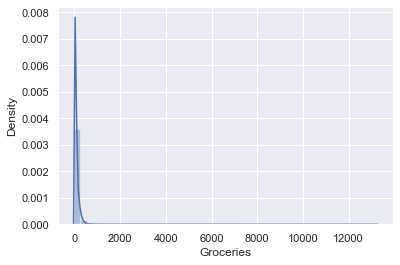

In [138]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['Groceries'])
plt.show()

In [144]:
# Let's declare a variable that will be equal to the 99th percentile of the 'BILLSERVICE' variable
q = df['Groceries'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'BILLSERVICE'
data_1 = df[df['Groceries']<q]
# In this way we have essentially removed the top 1% of the data about 'BILLSERVICE'
data_1.describe(include='all')

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
count,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,1.491770e+05,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000,149177.000000
mean,2.753541,0.829035,4.846216,0.683959,38.142047,1.926785,1.064735e+04,0.671048,0.588234,0.309847,0.832669,31.223614,1315.309361,3.681157,2.305905,82.237403,94.143730,80.882356,78.993009,94.301476,106.400925,320.829919,89.279556,1058.287438,0.441717,0.097984,0.418443,0.041132
std,0.738612,0.849298,2.217187,0.464931,9.987159,1.209412,8.230964e+04,0.469834,0.492155,0.462432,0.373273,26.390260,2538.335416,1.995229,0.757474,77.775119,620.794939,474.819916,241.357170,755.070458,448.004795,816.403697,560.720998,1747.779400,0.496593,0.297294,0.493305,0.198597
min,1.000000,0.000000,0.000000,0.000000,17.400000,1.000000,-5.998600e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.045000,0.010000,0.005000,0.001000,0.001000,0.010000,0.001000,0.001000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,0.000000,30.300000,1.000000,1.589070e+02,0.000000,0.000000,0.000000,1.000000,12.000000,346.490000,2.000000,2.000000,29.365000,31.274924,19.200000,20.100000,26.800000,20.500000,60.000000,27.204954,328.150000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000,36.800000,2.000000,8.534290e+02,1.000000,1.000000,0.000000,1.000000,25.000000,776.570000,3.000000,2.000000,52.973075,34.878861,49.740125,46.977889,65.955391,44.048477,181.031247,33.404360,698.165000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,6.000000,1.000000,44.100000,2.000000,4.529887e+03,1.000000,1.000000,1.000000,1.000000,44.000000,1460.320000,5.000000,3.000000,109.366320,87.881314,82.413509,83.755535,99.080000,106.350000,334.000000,90.359490,1297.583741,1.000000,0.000000,1.000000,0.000000
max,4.000000,10.000000,6.000000,1.000000,87.900000,57.000000,7.310833e+06,1.000000,1.000000,1.000000,1.000000,808.000000,197958.200000,58.000000,4.000000,443.951000,38612.000000,60174.750000,30374.650000,94757.300000,51582.902000,59440.000000,131991.616000,140569.535000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Groceries', ylabel='Density'>

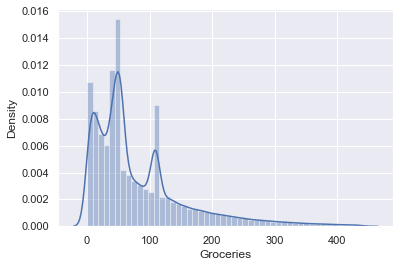

In [145]:
sns.distplot(data_1['Groceries'])

<AxesSubplot:xlabel='Transportation', ylabel='Density'>

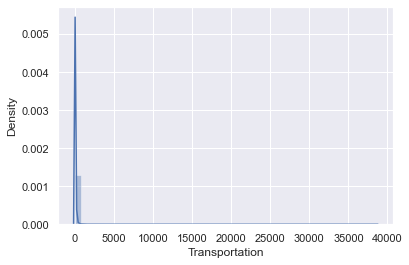

In [146]:
sns.distplot(df['Transportation'])

<AxesSubplot:xlabel='Transportation', ylabel='Density'>

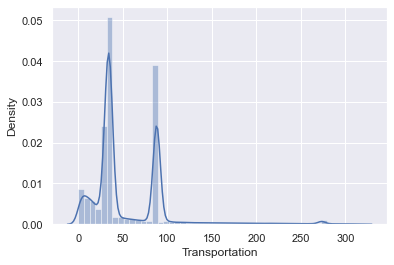

In [149]:
q = data_1['Transportation'].quantile(0.98)
data_2 = data_1[data_1['Transportation']<q]
sns.distplot(data_2['Transportation'])

In [150]:
data_2.describe(include='all')

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
count,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,1.461920e+05,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000,146192.000000
mean,2.760753,0.822042,4.847044,0.679456,38.130765,1.918258,1.032905e+04,0.669640,0.584280,0.309066,0.832761,31.055708,1261.094183,3.660795,2.299921,81.739033,53.726775,79.957157,77.843791,93.170406,102.830372,312.733667,85.900870,1040.785987,0.443362,0.099233,0.415980,0.040707
std,0.737101,0.845761,2.216301,0.466687,9.989076,1.198620,8.062569e+04,0.470344,0.492847,0.462110,0.373190,26.216610,2402.925733,1.981742,0.757511,77.395325,44.540303,476.248414,238.571466,762.122631,414.035269,793.913216,553.437178,1707.932665,0.496783,0.298975,0.492892,0.197611
min,1.000000,0.000000,0.000000,0.000000,17.400000,1.000000,-5.998600e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.045000,0.010000,0.005000,0.001000,0.001000,0.010000,0.001000,0.001000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,0.000000,30.300000,1.000000,1.548715e+02,0.000000,0.000000,0.000000,1.000000,12.000000,341.768500,2.000000,2.000000,29.200000,31.274924,19.040000,20.000000,26.500000,20.450000,59.250000,27.204954,324.500000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000,36.800000,2.000000,8.287070e+02,1.000000,1.000000,0.000000,1.000000,25.000000,764.777500,3.000000,2.000000,52.973075,34.878861,49.740125,46.977889,65.955391,44.048477,181.031247,33.404360,689.500000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,6.000000,1.000000,44.100000,2.000000,4.372633e+03,1.000000,1.000000,1.000000,1.000000,44.000000,1428.758750,5.000000,3.000000,109.366320,87.881314,82.200000,83.755535,98.702943,103.232500,327.500000,90.359490,1297.583741,1.000000,0.000000,1.000000,0.000000
max,4.000000,10.000000,6.000000,1.000000,87.900000,57.000000,7.310833e+06,1.000000,1.000000,1.000000,1.000000,808.000000,197958.200000,58.000000,4.000000,443.951000,317.260000,60174.750000,30374.650000,94757.300000,37437.708000,59440.000000,131991.616000,140569.535000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Health', ylabel='Density'>

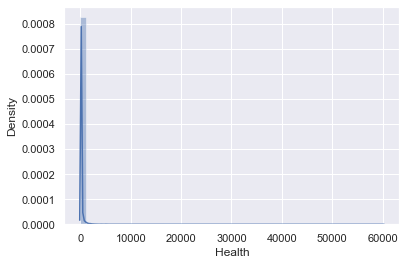

In [151]:
sns.distplot(df['Health'])

<AxesSubplot:xlabel='Health', ylabel='Density'>

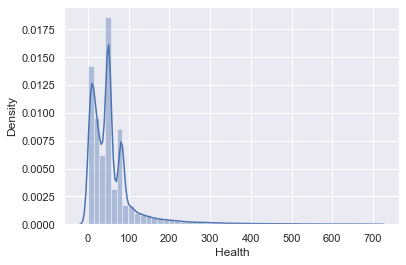

In [152]:
q = data_2['Health'].quantile(0.99)
data_3 = data_2[data_2['Health']<q]
sns.distplot(data_3['Health'])

In [153]:
data_3.describe(include='all')

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
count,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,1.447300e+05,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000,144730.000000
mean,2.763511,0.819954,4.845733,0.679873,38.133710,1.914240,1.022870e+04,0.668880,0.582927,0.308692,0.832460,30.965743,1238.619200,3.652608,2.297395,81.479828,53.624192,60.471329,77.457014,92.826600,102.407686,310.150454,85.008306,1034.462289,0.444310,0.099800,0.414835,0.040358
std,0.736964,0.845295,2.217222,0.466527,9.998047,1.189991,7.992677e+04,0.470618,0.493077,0.461955,0.373458,26.158972,2309.026588,1.975438,0.757605,77.166338,44.433721,72.269710,238.116263,765.586364,413.727560,788.854904,546.217225,1665.755531,0.496891,0.299734,0.492695,0.196798
min,1.000000,0.000000,0.000000,0.000000,17.400000,1.000000,-5.998600e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.045000,0.010000,0.005000,0.001000,0.001000,0.010000,0.001000,0.001000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,0.000000,30.300000,1.000000,1.530335e+02,0.000000,0.000000,0.000000,1.000000,11.000000,339.066250,2.000000,2.000000,29.105000,31.274924,18.872750,20.000000,26.350000,20.400000,59.000000,27.204954,322.800000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000,36.800000,2.000000,8.169415e+02,1.000000,1.000000,0.000000,1.000000,25.000000,758.810000,3.000000,2.000000,52.973075,34.878861,49.740125,46.977889,65.955391,44.048477,181.031247,33.404360,686.070000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,6.000000,1.000000,44.100000,2.000000,4.309675e+03,1.000000,1.000000,1.000000,1.000000,44.000000,1410.005250,5.000000,3.000000,109.366320,87.881314,78.867500,83.755535,98.702943,102.340000,324.897500,90.359490,1297.583741,1.000000,0.000000,1.000000,0.000000
max,4.000000,10.000000,6.000000,1.000000,87.900000,57.000000,7.310833e+06,1.000000,1.000000,1.000000,1.000000,808.000000,197958.200000,58.000000,4.000000,443.951000,317.250000,707.060000,30374.650000,94757.300000,37437.708000,59440.000000,131991.616000,140569.535000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Utilities', ylabel='Density'>

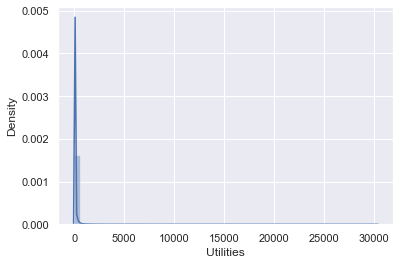

In [154]:
sns.distplot(df['Utilities'])

<AxesSubplot:xlabel='Utilities', ylabel='Density'>

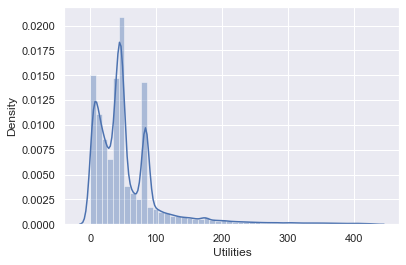

In [155]:
q = data_3['Utilities'].quantile(0.98)
data_4 = data_3[data_3['Utilities']<q]
sns.distplot(data_4['Utilities'])

In [156]:
data_4.describe(include='all')

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
count,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,1.418320e+05,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.000000,141832.00000,141832.000000,141832.000000,141832.000000,141832.000000
mean,2.769340,0.813216,4.844675,0.677830,38.112671,1.906707,9.874891e+03,0.668340,0.579044,0.307899,0.832252,30.775065,1203.376356,3.635125,2.292543,80.878352,53.373449,60.157045,56.580146,92.159265,100.553107,304.677443,82.790563,1017.68237,0.445499,0.100661,0.413151,0.039998
std,0.736113,0.842856,2.218272,0.467309,10.022784,1.154583,7.247408e+04,0.470811,0.493714,0.461626,0.373643,25.656458,2185.254140,1.950195,0.757743,76.669117,44.102605,71.772708,58.405895,772.816941,396.738529,770.997064,489.041479,1560.94427,0.497023,0.300881,0.492401,0.195955
min,1.000000,0.000000,0.000000,0.000000,17.400000,1.000000,-5.998600e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.045000,0.010000,0.005000,0.001000,0.001000,0.010000,0.001000,0.001000,0.20000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,0.000000,30.300000,1.000000,1.504337e+02,0.000000,0.000000,0.000000,1.000000,11.000000,333.603750,2.000000,2.000000,28.868750,31.274924,18.800000,20.000000,26.150000,20.258750,58.500000,27.204954,320.00000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000,36.700000,2.000000,8.002170e+02,1.000000,1.000000,0.000000,1.000000,25.000000,745.754000,3.000000,2.000000,52.973075,34.878861,49.740125,46.400000,65.955391,44.048477,180.900000,33.404360,680.00000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,6.000000,1.000000,44.100000,2.000000,4.204669e+03,1.000000,1.000000,1.000000,1.000000,44.000000,1379.820000,5.000000,3.000000,109.366320,87.881314,78.000000,80.020000,98.702943,100.200000,319.622500,90.359490,1283.16000,1.000000,0.000000,1.000000,0.000000
max,4.000000,10.000000,6.000000,1.000000,87.900000,50.000000,7.310833e+06,1.000000,1.000000,1.000000,1.000000,271.000000,197958.200000,51.000000,4.000000,443.951000,317.250000,707.060000,429.840000,94757.300000,29270.750000,59440.000000,131991.616000,93930.00000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='DiningOut', ylabel='Density'>

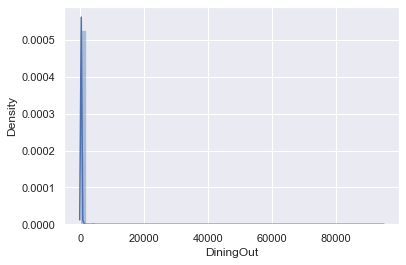

In [157]:
sns.distplot(df['DiningOut'])

<AxesSubplot:xlabel='DiningOut', ylabel='Density'>

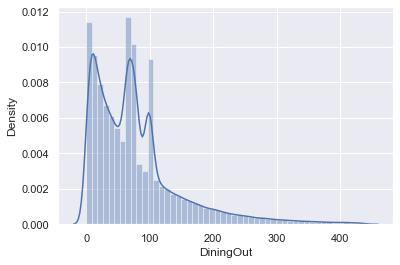

In [158]:
q = data_4['DiningOut'].quantile(0.99)
data_5 = data_4[data_4['DiningOut']<q]
sns.distplot(data_5['DiningOut'])

In [159]:
data_5.describe(include='all')

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
count,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,1.404130e+05,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000,140413.000000
mean,2.773390,0.810039,4.845556,0.676383,38.105781,1.902993,9.800405e+03,0.667417,0.577418,0.307593,0.832231,30.560112,1180.068326,3.625369,2.289781,80.519329,53.170955,59.810935,56.303550,77.900298,98.911670,300.411198,80.851742,1009.599974,0.445842,0.101330,0.412348,0.039818
std,0.735661,0.841226,2.217529,0.467857,10.030394,1.152619,7.261662e+04,0.471140,0.493972,0.461499,0.373663,25.355849,2003.464230,1.945451,0.757701,76.371662,43.843675,71.312459,58.083212,71.023202,389.777470,765.866132,485.069850,1534.259506,0.497060,0.301766,0.492259,0.195533
min,1.000000,0.000000,0.000000,0.000000,17.400000,1.000000,-5.998600e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.045000,0.010000,0.005000,0.001000,0.001000,0.010000,0.001000,0.001000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,0.000000,30.300000,1.000000,1.485550e+02,0.000000,0.000000,0.000000,1.000000,11.000000,330.995000,2.000000,2.000000,28.735000,31.274924,18.650000,20.000000,25.800000,20.150000,58.000000,27.204954,320.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000,36.700000,2.000000,7.895900e+02,1.000000,1.000000,0.000000,1.000000,25.000000,739.270000,3.000000,2.000000,52.973075,34.878861,49.740125,46.100000,65.955391,44.048477,179.105000,33.404360,675.500000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,6.000000,1.000000,44.100000,2.000000,4.148517e+03,1.000000,1.000000,1.000000,1.000000,43.000000,1364.640000,5.000000,3.000000,109.366320,87.881314,77.015000,79.550000,98.702943,99.144000,315.000000,90.359490,1272.550000,1.000000,0.000000,1.000000,0.000000
max,4.000000,10.000000,6.000000,1.000000,87.900000,50.000000,7.310833e+06,1.000000,1.000000,1.000000,1.000000,271.000000,197958.200000,51.000000,4.000000,443.951000,317.250000,707.060000,429.840000,439.422000,29270.750000,59440.000000,131991.616000,93930.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='BillsAndServices', ylabel='Density'>

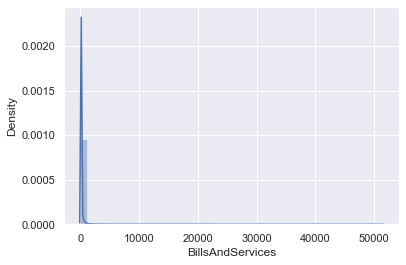

In [160]:
sns.distplot(df['BillsAndServices'])

<AxesSubplot:xlabel='BillsAndServices', ylabel='Density'>

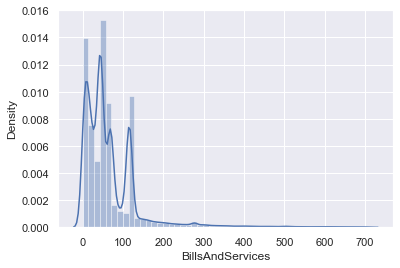

In [163]:
q = data_5['BillsAndServices'].quantile(0.985)
data_6 = data_5[data_5['BillsAndServices']<q]
sns.distplot(data_6['BillsAndServices'])

In [164]:
data_6.describe(include='all')

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
count,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,1.383060e+05,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000,138306.000000
mean,2.778014,0.804911,4.851171,0.673413,38.064031,1.897033,9.537568e+03,0.667267,0.574632,0.306798,0.832957,30.527497,1134.123472,3.612526,2.286170,80.097674,52.908470,59.627210,56.034818,77.610002,68.433789,289.210698,79.588474,986.983931,0.447761,0.102143,0.410192,0.039275
std,0.733379,0.838217,2.212735,0.468967,10.039616,1.146285,7.196382e+04,0.471194,0.494401,0.461166,0.373015,25.314230,1857.864469,1.937551,0.757807,76.057106,43.540421,71.112945,57.691104,70.734153,80.995300,724.801621,483.893632,1437.067194,0.497265,0.302837,0.491870,0.194250
min,1.000000,0.000000,0.000000,0.000000,17.400000,1.000000,-5.998600e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.045000,0.010000,0.005000,0.001000,0.001000,0.010000,0.001000,0.001000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,0.000000,30.300000,1.000000,1.451895e+02,0.000000,0.000000,0.000000,1.000000,11.000000,327.588750,2.000000,2.000000,28.510000,31.274924,18.600000,20.000000,25.700000,20.000000,57.250000,27.204954,316.792500,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000,36.600000,2.000000,7.692940e+02,1.000000,1.000000,0.000000,1.000000,25.000000,729.254500,3.000000,2.000000,52.973075,34.878861,49.740125,46.000000,65.955391,44.048477,176.658500,33.404360,669.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,6.000000,1.000000,44.000000,2.000000,4.011903e+03,1.000000,1.000000,1.000000,1.000000,43.000000,1336.047500,5.000000,3.000000,109.366320,87.881314,76.277500,78.655750,98.702943,90.000000,308.521750,90.359490,1250.000000,1.000000,0.000000,1.000000,0.000000
max,4.000000,10.000000,6.000000,1.000000,87.900000,50.000000,7.310833e+06,1.000000,1.000000,1.000000,1.000000,271.000000,197958.200000,51.000000,4.000000,443.885000,317.250000,707.060000,429.840000,439.422000,709.131000,59440.000000,131991.616000,72152.200000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Shopping', ylabel='Density'>

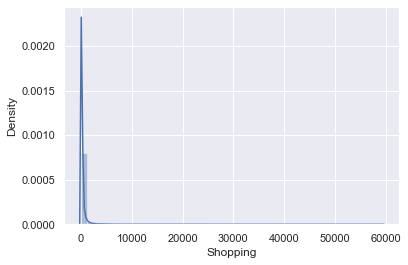

In [165]:
sns.distplot(df['Shopping'])

<AxesSubplot:xlabel='Shopping', ylabel='Density'>

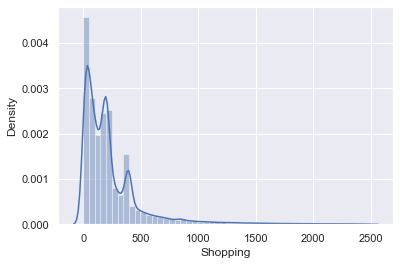

In [166]:
q = data_6['Shopping'].quantile(0.99)
data_7 = data_6[data_6['Shopping']<q]
sns.distplot(data_7['Shopping'])

In [167]:
data_7.describe(include='all')

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
count,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,1.369220e+05,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000,136922.000000
mean,2.781474,0.802552,4.854706,0.673551,38.054389,1.892289,9.263179e+03,0.666971,0.573451,0.306861,0.833540,30.446115,1084.067574,3.604088,2.284206,79.832161,52.747740,59.348735,55.809914,77.251020,67.789665,240.554110,78.413643,970.927595,0.449351,0.102861,0.408276,0.038891
std,0.732523,0.837124,2.209692,0.468915,10.047649,1.133862,6.786723e+04,0.471299,0.494577,0.461193,0.372494,25.243404,1685.163469,1.927357,0.757415,75.802015,43.298726,70.650175,57.408224,70.360875,79.747334,303.111245,483.470100,1385.300577,0.497430,0.303779,0.491517,0.193335
min,1.000000,0.000000,0.000000,0.000000,17.400000,1.000000,-5.998600e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.045000,0.010000,0.005000,0.001000,0.001000,0.010000,0.001000,0.001000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,0.000000,30.200000,1.000000,1.427858e+02,0.000000,0.000000,0.000000,1.000000,11.000000,324.903750,2.000000,2.000000,28.446250,31.274924,18.500000,20.000000,25.550000,20.000000,56.483500,27.204954,314.659500,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000,36.600000,2.000000,7.540750e+02,1.000000,1.000000,0.000000,1.000000,25.000000,722.860000,3.000000,2.000000,52.973075,34.878861,49.740125,45.900000,65.955391,44.048477,173.200000,33.404360,662.925000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,6.000000,1.000000,44.000000,2.000000,3.914845e+03,1.000000,1.000000,1.000000,1.000000,43.000000,1314.926750,5.000000,3.000000,109.366320,87.881314,75.524250,78.000000,98.702943,87.947500,298.591250,90.359490,1237.231500,1.000000,0.000000,1.000000,0.000000
max,4.000000,10.000000,6.000000,1.000000,87.900000,37.000000,6.808125e+06,1.000000,1.000000,1.000000,1.000000,271.000000,197958.200000,38.000000,4.000000,443.885000,317.250000,707.060000,429.840000,439.422000,709.131000,2478.000000,131991.616000,72152.200000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Entertainment', ylabel='Density'>

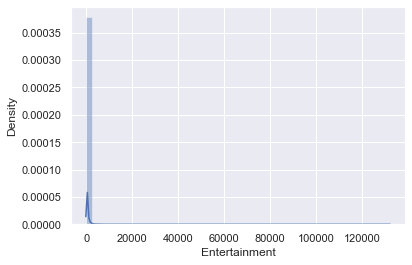

In [168]:
sns.distplot(df['Entertainment'])

<AxesSubplot:xlabel='Entertainment', ylabel='Density'>

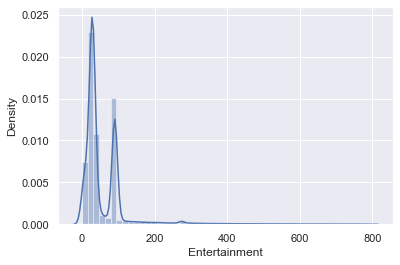

In [169]:
q = data_7['Entertainment'].quantile(0.99)
data_8 = data_7[data_7['Entertainment']<q]
sns.distplot(data_8['Entertainment'])

In [170]:
data_8.describe(include='all')

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
count,135552.000000,135552.000000,135552.000000,135552.00000,135552.000000,135552.000000,1.355520e+05,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000,135552.000000
mean,2.786016,0.796617,4.856446,0.67158,38.048651,1.887571,9.166007e+03,0.666475,0.570253,0.305742,0.833754,30.443417,1067.601100,3.591493,2.280077,79.621823,52.523454,59.113133,55.669717,76.729539,67.483490,238.468745,60.988332,962.468726,0.450580,0.103599,0.406634,0.038576
std,0.731595,0.832949,2.208048,0.46964,10.051221,1.131212,6.805171e+04,0.471474,0.495042,0.460723,0.372303,25.212532,1534.370665,1.921199,0.757421,75.668308,42.972594,70.344152,57.251716,69.800673,79.250995,299.780041,81.132584,1347.693111,0.497553,0.304740,0.491207,0.192582
min,1.000000,0.000000,0.000000,0.00000,17.400000,1.000000,-5.998600e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.045000,0.010000,0.005000,0.001000,0.001000,0.010000,0.001000,0.001000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,0.00000,30.200000,1.000000,1.405665e+02,0.000000,0.000000,0.000000,1.000000,11.000000,323.780000,2.000000,2.000000,28.370000,31.274924,18.450000,20.000000,25.362500,20.000000,56.000000,27.204954,312.500000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.00000,36.600000,2.000000,7.412825e+02,1.000000,1.000000,0.000000,1.000000,25.000000,719.222500,3.000000,2.000000,52.973075,34.878861,49.740125,45.740000,65.955391,44.048477,172.000000,33.404360,660.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,6.000000,1.00000,44.000000,2.000000,3.839452e+03,1.000000,1.000000,1.000000,1.000000,43.000000,1303.169250,5.000000,3.000000,109.366320,87.881314,74.902500,77.430750,98.702943,86.564500,294.917500,90.359490,1226.351500,1.000000,0.000000,1.000000,0.000000
max,4.000000,10.000000,6.000000,1.00000,87.900000,37.000000,6.808125e+06,1.000000,1.000000,1.000000,1.000000,271.000000,62761.050000,38.000000,4.000000,443.885000,317.250000,707.060000,429.840000,439.422000,709.131000,2478.000000,792.465000,61857.650000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='MoneyTransfer', ylabel='Density'>

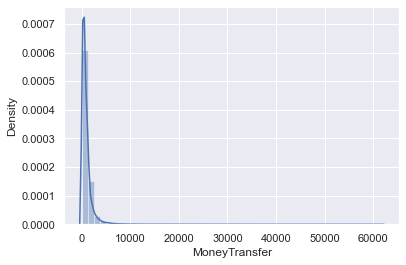

In [172]:
sns.distplot(data_8['MoneyTransfer'])

<AxesSubplot:xlabel='MoneyTransfer', ylabel='Density'>

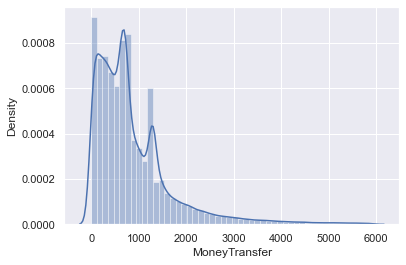

In [173]:
q = data_8['MoneyTransfer'].quantile(0.99)
data_9 = data_8[data_8['MoneyTransfer']<q]
sns.distplot(data_9['MoneyTransfer'])

In [174]:
data_9.describe(include='all')

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
count,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,1.341960e+05,134196.00000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000,134196.000000
mean,2.788943,0.795217,4.858483,0.669364,38.027803,1.884997,8.951325e+03,0.66660,0.569205,0.305717,0.833989,30.332014,1000.818397,3.586538,2.278861,79.403329,52.372380,58.979104,55.492920,76.548258,67.107472,236.164461,60.653135,873.421939,0.451146,0.104236,0.405623,0.038392
std,0.730595,0.832781,2.206514,0.470444,10.052634,1.128537,6.691727e+04,0.47143,0.495189,0.460712,0.372092,25.115670,1238.848782,1.917992,0.757158,75.517999,42.807601,70.143654,57.027466,69.628727,78.564522,295.377166,80.627475,845.702419,0.497609,0.305567,0.491014,0.192140
min,1.000000,0.000000,0.000000,0.000000,17.400000,1.000000,-5.998600e+01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.045000,0.010000,0.005000,0.001000,0.001000,0.010000,0.001000,0.001000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,0.000000,30.200000,1.000000,1.385990e+02,0.00000,0.000000,0.000000,1.000000,11.000000,320.409500,2.000000,2.000000,28.260000,31.274924,18.450000,20.000000,25.300000,20.000000,55.740000,27.204954,310.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000,36.500000,2.000000,7.283575e+02,1.00000,1.000000,0.000000,1.000000,25.000000,711.798500,3.000000,2.000000,52.973075,34.878861,49.740125,45.500000,65.955391,44.048477,171.042500,33.404360,653.044044,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,6.000000,1.000000,44.000000,2.000000,3.762131e+03,1.00000,1.000000,1.000000,1.000000,43.000000,1282.108750,5.000000,3.000000,109.366320,87.881314,74.408750,76.652500,98.702943,85.102500,292.012500,90.359490,1195.000000,1.000000,0.000000,1.000000,0.000000
max,4.000000,10.000000,6.000000,1.000000,87.900000,37.000000,6.808125e+06,1.00000,1.000000,1.000000,1.000000,271.000000,62761.050000,38.000000,4.000000,443.885000,317.250000,707.060000,429.840000,439.422000,709.131000,2478.000000,792.465000,5929.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
data_9

,customer_category,NO_OF_ALL_CC,NO_OF_SAL_HITS,GENDER_DESC,CUST_AGE,NO_OF_ALL_ACC,KD_BAL_ALL_ACC,IS_CUST_HOLDING_PF,IS_CUST_HOLDING_CC,IS_CUST_HOLDING_PRE_PAID,IS_CUST_WITH_SAL_TRF,NO_OF_POS_TXS,KD_OF_ALL_POS_TXS,NO_OF_ALL_PRODUCTS,NO_OF_ALL_PRODUCT_CATEGORIES,Groceries,Transportation,Health,Utilities,DiningOut,BillsAndServices,Shopping,Entertainment,MoneyTransfer,CUST_SEGMENT_BAL_1. Basic Saver,CUST_SEGMENT_BAL_1. Inactive,CUST_SEGMENT_BAL_2. Smart Saver,CUST_SEGMENT_BAL_3. Long Term Planner
cif,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135017757,1,3,0,1,37.4,2,5310.994995,1,1,1,0,12,244.450,8,3,161.885000,20.000000,28.000000,32.200000,22.700000,277.547265,166.800000,274.827822,1457.294022,0,0,1,0
135017850,1,4,0,1,40.2,4,2233.969002,1,1,1,0,35,3673.000,9,3,55.215000,273.284008,107.234364,110.245000,78.200000,0.490000,48.606000,274.827822,1457.294022,1,0,0,0
232218140,1,3,0,1,45.8,14,57581.537598,1,1,1,0,37,760.704,18,4,254.025000,273.284008,107.234364,410.000000,59.900000,161.136000,38.250000,274.827822,1457.294022,0,0,0,1
135018310,1,5,0,1,67.5,3,9492.726345,1,1,1,0,3,410.000,9,3,132.730000,273.284008,15.350000,174.121646,40.050000,91.790000,49.000000,274.827822,1457.294022,1,0,0,0
164717882,1,1,0,1,39.0,5,6058.312927,1,1,1,0,26,1543.593,9,3,49.860000,273.284008,207.080000,31.360000,35.580000,277.547265,9.700000,456.450000,1457.294022,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275361,4,0,6,1,24.6,1,257.980011,0,0,0,1,40,485.685,1,1,5.175000,172.000000,20.890000,18.500000,23.070000,2.750000,75.740000,33.404360,198.000000,1,0,0,0
1275399,4,0,5,0,28.6,1,0.787000,0,0,0,1,12,85.550,1,1,5.500000,31.274924,42.000000,40.389515,10.300000,68.930175,11.750000,33.404360,86.000000,0,1,0,0
1275412,4,0,0,0,55.0,2,1651.383057,0,0,0,0,6,200.000,2,1,43.130251,31.274924,49.740125,10.000000,76.744204,68.930175,40.000000,33.404360,110.000000,0,0,1,0


### Data preprocessing

In [312]:
col = ['Groceries','Transportation','Health','Utilities','DiningOut','BillsAndServices','Shopping','Entertainment','MoneyTransfer']
X = df.drop(col,axis=1).values

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
#y= df['Groceries']

In [313]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



param_test ={'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4,0.5],
             'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
             'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7,8],
             'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [314]:
def model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    clf = lgb.LGBMRegressor(objective="regression",metric="rmse",random_state=42, n_jobs=-1)
    gs = RandomizedSearchCV(
        estimator=clf, param_distributions=param_test, 
        n_iter=100,
        scoring='r2',
        cv=5,
        refit=True,
        random_state=314,
        verbose=True)

    gs.fit(X_train, y_train)
    opt_parameters  = gs.best_params_

    print('opt_parameters:',opt_parameters)
    print('gs.best_score:',gs.best_score_)

    clf_sw = lgb.LGBMRegressor(**clf.get_params())
    #set optimal parameters
    clf_sw.set_params(**opt_parameters)
    clf_sw.fit(X_train, y_train)
    y_pred = clf_sw.predict(X_test)

    d = pd.DataFrame({'Groceries_TRUE':y_test,'Groceries_PRED':y_pred})
    return d

In [315]:
d = model(X,df['Shopping'].values)
#neg_mean_absolute_percentage_error ##with salary_temp --> 0.226

Fitting 5 folds for each of 100 candidates, totalling 500 fits
opt_parameters: {'colsample_bytree': 0.7726165643194665, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 162, 'min_child_weight': 1e-05, 'n_estimators': 2000, 'num_leaves': 7, 'reg_alpha': 7, 'reg_lambda': 5, 'subsample': 0.6552051921476996}
gs.best_score: 0.22602512857886844


In [316]:
d

,Groceries_TRUE,Groceries_PRED
0,274.383000,197.888936
1,2278.200000,540.465862
2,180.036867,240.394068
3,166.640000,174.810256
4,108.200000,252.887759
...,...,...
29782,17.250000,255.531983
29783,128.950000,302.032326
29784,207.774604,246.421978
29785,13.500000,122.981498


In [ ]:
d 

In [100]:
d = model(X,df['Shopping'].values)
#neg_mean_absolute_percentage_error

Fitting 5 folds for each of 100 candidates, totalling 500 fits
opt_parameters: {'colsample_bytree': 0.49122114282899176, 'learning_rate': 0.04, 'max_depth': -1, 'min_child_samples': 114, 'min_child_weight': 1e-05, 'n_estimators': 800, 'num_leaves': 34, 'reg_alpha': 0.1, 'reg_lambda': 5, 'subsample': 0.46525433536110117}
gs.best_score: 0.22199300211244632


In [101]:
d

,Groceries_TRUE,Groceries_PRED
0,204.936000,267.129593
1,13.915000,133.364487
2,181.031247,192.420352
3,125.350000,127.372696
4,101.050000,229.619149
...,...,...
30132,848.747938,973.228961
30133,208.218540,102.453027
30134,231.900000,123.312336
30135,100.900000,200.956210


In [129]:
d = model(X,df['MoneyTransfer'].values)
#neg_mean_absolute_percentage_error

Fitting 5 folds for each of 100 candidates, totalling 500 fits
opt_parameters: {'colsample_bytree': 0.49122114282899176, 'learning_rate': 0.04, 'max_depth': -1, 'min_child_samples': 114, 'min_child_weight': 1e-05, 'n_estimators': 800, 'num_leaves': 34, 'reg_alpha': 0.1, 'reg_lambda': 5, 'subsample': 0.46525433536110117}
gs.best_score: 0.4283034585961797


In [130]:
d

,Groceries_TRUE,Groceries_PRED
0,910.000000,1186.828844
1,614.368000,440.045661
2,31.186000,485.912828
3,20.000000,543.511834
4,404.000000,513.371682
...,...,...
30132,1457.294022,1125.478819
30133,400.000000,656.682313
30134,210.000000,459.966314
30135,969.000000,1034.883314


In [73]:
d ##-3.398 5000 fit , 500 iteration , 10 cv

,Groceries_TRUE,Groceries_PRED
0,37.045000,104.260988
1,6.600000,57.403695
2,43.130251,40.193722
3,16.365000,56.887446
4,56.100000,35.087607
...,...,...
30132,133.019879,147.816750
30133,111.195000,53.291437
30134,56.555000,64.268340
30135,9.295000,149.991378


In [45]:
d ## 5 cv ##-3.2456625312621448 ##100 iter

,Groceries_TRUE,Groceries_PRED
0,7.025000,36.011422
1,6.385000,24.486426
2,21.800000,9.481879
3,102.915000,37.231065
4,33.000000,99.855263
...,...,...
9594,195.845000,65.160335
9595,42.675000,51.393114
9596,80.795000,122.245280
9597,15.000000,15.033595


In [34]:
d ##3 cv ##-3.5  ##100 iter

,Groceries_TRUE,Groceries_PRED
0,7.025000,41.127021
1,6.385000,58.577444
2,21.800000,8.301056
3,102.915000,35.684892
4,33.000000,96.939182
...,...,...
9594,195.845000,60.008833
9595,42.675000,56.485143
9596,80.795000,127.226933
9597,15.000000,16.187818


In [21]:
#df_1.shape

In [22]:
#df_1['Groceries'].where(~(df_1.Groceries ==0), other=a, inplace=True)

In [23]:
#df_1

In [24]:
#df_1.replace(0,df_1[outputs].mean(axis=0),inplace=True)
#df_1

In [25]:
#df_2 = df.query('customer_category == 2')
#df_2

In [26]:
#df_2.replace(0,df_2[outputs].mean(axis=0),inplace=True)
#df_2

In [27]:
#df_merge = pd.concat([df_1,df_2])
#df_merge

In [28]:
#df['Groceries'].where(~(df.Groceries ==0), other=a, inplace=True)
#df

In [29]:
#df['Groceries'] = np.where((df.customer_category==1) & (df.customer_category==1) , a, df['Groceries'])
#df